# **Exploratory Data Analysis**

There important steps to keep in mind are:
1-Understand the data
2-Clean the data
3-Find a relationship between data

In [2]:
#important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Pre-intalled dataset of seaborn

In [3]:
kashti=sns.load_dataset('titanic')

Convert the data into csv format

In [4]:
kashti.to_csv('kashti.csv')

Getting information of dataset

In [5]:
kashti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


How dataset will looks like

In [6]:
kashti.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


To get the numbers of rows and columns of dataset

In [7]:
kashti.shape

(891, 15)

To get the information of numeric variables like int, float etc

In [8]:
kashti.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


How to get unique values from each column of datasets

In [9]:
kashti.nunique()

survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

 Get the name of every columns
 

In [10]:
column_name=kashti.columns
print(column_name)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


Get unique value in each column

In [11]:
[print(f'{i} {kashti[i].unique()}') for i in column_name]

survived [0 1]
pclass [3 1 2]
sex ['male' 'female']
age [22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]
sibsp [1 0 3 4 2 5 8]
parch [0 1 2 5 3 4 6]
fare [  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958  27.7208 146.5208   7.75    10.5     82.1708  52.
   7.2292  11.2417   9.475   21.      41.5792  15.5     21.6792  17.8
  39.6875   7.

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

Cleaning and filtering the data

Find missing values inside the dataset

In [12]:
kashti.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

As we see there are many null values in deck column so we have to drop this column

In [13]:
kashti_clean=kashti.drop('deck',axis=1)
kashti_clean.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


Now we still have null values in the dataset like in age columns so if we remove it then it will effect our whole the dataset because we can see that only 177 out of 891 rows have null values. So we should removes those column who have null values .

In [14]:
kashti_clean=kashti_clean.dropna()
kashti_clean.isnull().sum()
kashti_clean.shape


(712, 14)

To counts the number of unique values in each columns

In [16]:
kashti_clean['sex'].value_counts()

sex
male      453
female    259
Name: count, dtype: int64

For checking outliers we are going to make boxplot of any variables in the dataset

<Axes: xlabel='sex', ylabel='age'>

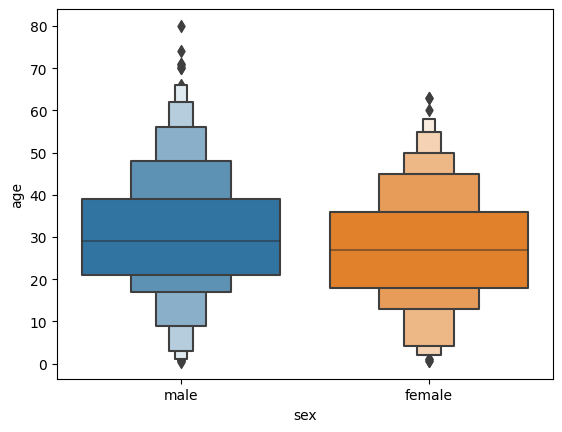

In [17]:
sns.boxenplot(x='sex',y='age',data=kashti_clean)

Now we are going to check the normality of variables by using displot method

C:\Users\Mohit Computers\AppData\Local\Temp\ipykernel_14108\3411467423.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(kashti_clean['age'])


<Axes: xlabel='age', ylabel='Density'>

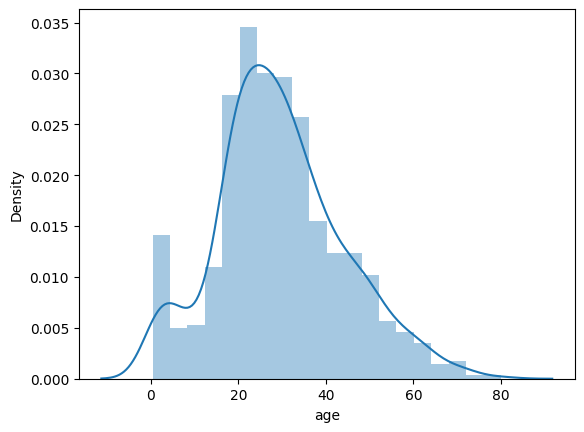

In [18]:
sns.distplot(kashti_clean['age'])


c:\Users\Mohit Computers\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


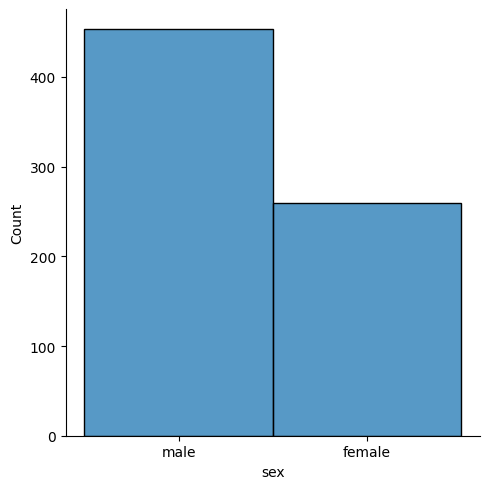

In [19]:
sns.displot(kashti_clean['sex'])

Lets remove outlier 

In [20]:
kashti_clean.shape

(712, 14)

In [21]:
kashti_clean=kashti_clean[kashti_clean['age']<60]
kashti_clean.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [22]:
kashti_clean.shape

(687, 14)

<Axes: ylabel='age'>

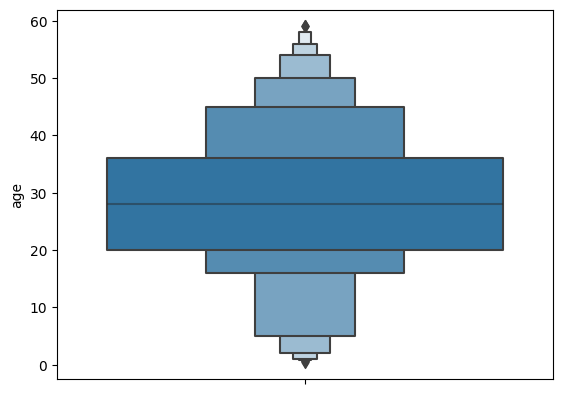

In [23]:
sns.boxenplot(y='age',data=kashti_clean)

<Axes: >

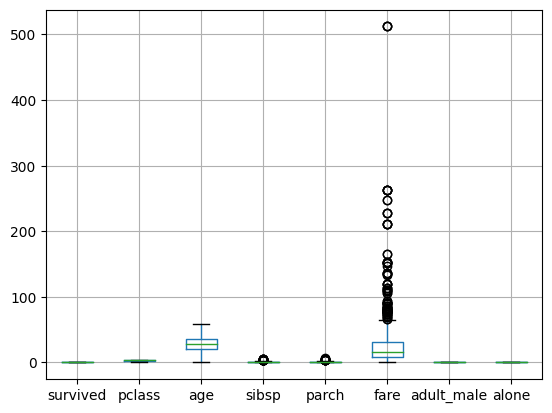

In [24]:
kashti_clean.boxplot()

Finding Relationship or correlation between the columns of dataset

In [32]:
# kashti_clean['who'] = kashti_clean['who'].map({'man': 1, 'women': 0})
# corr_kashti_clean = kashti_clean.corr()
kashti_clean=kashti_clean.drop('fare',axis=1)
kashti_clean.head()


,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,S,Third,man,True,Southampton,no,True


<Axes: >

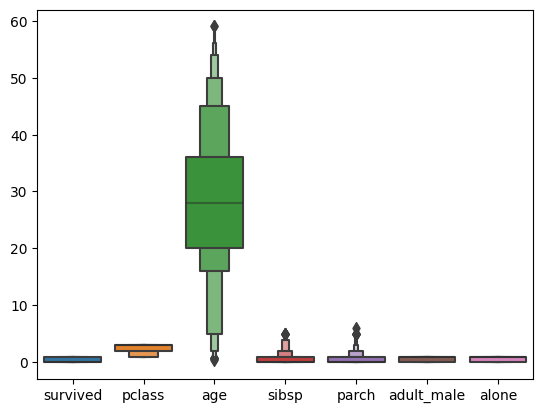

In [33]:
sns.boxenplot(kashti_clean)

# **Bayes's Model**

In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [47]:
lb=LabelEncoder()
kashti_clean['sex']=lb.fit_transform(kashti_clean['sex'])
kashti_clean['class']=lb.fit_transform(kashti_clean['class'])
kashti_clean['who']=lb.fit_transform(kashti_clean['who'])
kashti_clean['adult_male']=lb.fit_transform(kashti_clean['adult_male'])
kashti_clean['embark_town']=lb.fit_transform(kashti_clean['embark_town'])
kashti_clean['alone']=lb.fit_transform(kashti_clean['alone'])
kashti_clean['alive']=lb.fit_transform(kashti_clean['alive'])
kashti_clean['embarked']=lb.fit_transform(kashti_clean['embarked'])

In [48]:
kashti_clean.head()

,survived,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,2,2,1,1,2,0,0
1,1,1,0,38.0,1,0,0,0,2,0,0,1,0
2,1,3,0,26.0,0,0,2,2,2,0,2,1,1
3,1,1,0,35.0,1,0,2,0,2,0,2,1,0
4,0,3,1,35.0,0,0,2,2,1,1,2,0,1


In [49]:
kashti_clean.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [50]:
kashti_clean.shape

(687, 13)

In [51]:
x=kashti_clean.drop('survived',axis=1)
y=kashti_clean['survived']

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(549, 12)
(549,)
(138, 12)
(138,)


In [53]:
x_train.head()

,pclass,sex,age,sibsp,parch,embarked,class,who,adult_male,embark_town,alive,alone
360,3,1,40.0,1,4,2,2,1,1,2,0,0
144,2,1,18.0,0,0,2,1,1,1,2,0,1
111,3,0,14.5,1,0,0,2,0,0,0,0,0
71,3,0,16.0,5,2,2,2,2,0,2,0,0
282,3,1,16.0,0,0,2,2,1,1,2,0,1


# **MultinomialNB and BernoulliNB**

In [54]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
clf1=MultinomialNB()
clf2=BernoulliNB()
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)

BernoulliNB()

In [58]:
pred1=clf1.predict(x_test)
pred2=clf2.predict(x_test)

In [64]:
cm1=confusion_matrix(y_test,pred1)
cr1=classification_report(y_test,pred1)
cm2=confusion_matrix(y_test,pred2)
cr2=classification_report(y_test,pred2)
print(cr1)
print(cr2)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        80
           1       0.89      1.00      0.94        58

    accuracy                           0.95       138
   macro avg       0.95      0.96      0.95       138
weighted avg       0.95      0.95      0.95       138

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        58

    accuracy                           1.00       138
   macro avg       1.00      1.00      1.00       138
weighted avg       1.00      1.00      1.00       138

